In [1]:
import re
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from statsmodels.tsa.seasonal import STL
plt.rcParams["figure.figsize"] = (20, 10)

In [2]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

sns.set(style='white')
#iris = _sns.load_dataset('iris')

def my_scatter(x,y, **kwargs):
    key_name = kwargs.pop('key_name', None)
    if (x.name == key_name) or (y.name == key_name):
        kwargs['color'] = 'red'
    else: kwargs['color'] = '#1f77b4'
    plt.scatter(x,y, **kwargs)

def my_hist(x, **kwargs):
    key_name = kwargs.pop('key_name', None)
    if (x.name == key_name):
        kwargs['color'] = 'red'
    else: kwargs['color'] = '#1f77b4'
    plt.hist(x, **kwargs)

def my_kde(x,y, **kwargs):
    key_name = kwargs.pop('key_name', None)
    if (x.name == key_name) or (y.name == key_name):
        kwargs['cmap'] = 'Reds_d'
    else: kwargs['cmap'] = 'Blues_d'
    sns.kdeplot(x = x,y = y, **kwargs)

def corrfunc(x, y, **kwargs):
  r, p = stats.pearsonr(x, y)
  p_stars = ''
  if p <= 0.05:
    p_stars = '*'
  if p <= 0.01:
    p_stars = '**'
  if p <= 0.001:
    p_stars = '***'
  ax = plt.gca()
  ax.annotate('r = {:.2f} '.format(r) + p_stars,
              xy=(0.05, 0.9), xycoords=ax.transAxes)

def annotate_colname(x, **kwargs):
  ax = plt.gca()
  ax.annotate(x.name, xy=(0.05, 0.9), xycoords=ax.transAxes,
              fontweight='bold')

def annotate_colname(x, **kwargs):
  ax = plt.gca()
  ax.annotate(x.name, xy=(0.05, 0.9), xycoords=ax.transAxes,
              fontweight='bold')

def cor_matrix(df, as_returns = False, fname = None, key_name = None):
  if as_returns == True:
      df = df.select_dtypes(include=numerics)
      df = df.pct_change(1)
      df = df.dropna()
  g = sns.PairGrid(df, palette=['red'])
  # Use normal regplot as `lowess=True` doesn't provide CIs.
  g.map_upper(my_scatter, key_name = key_name)
  g.map_diag(my_hist, key_name = key_name)
  g.map_diag(annotate_colname)
  g.map_lower(my_kde, key_name = key_name)
  g.map_lower(corrfunc)
  # Remove axis labels, as they're in the diagonals.
  for ax in g.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')
  if fname is not None:
      plt.savefig(fname, dpi=600, bbox_inches='tight')
  plt.show()
  return g

In [3]:
def parse_dat(file):
    """
    parses the results csv, named as results_[day].csv
    """
    #day_lookup = r"(?<=_)(.*)(?=\.)"
    day_lookup = r"(?<=_).*prices_round_\d_(day_-?\d)(?=\.)"
    day = re.findall(day_lookup,file)[0]
    #print(fname)
    df = pd.read_csv(file, index_col=False, sep=";")
    return day,  df

In [4]:
output_dfs = {}
mypath = os.getcwd()
print(mypath)
rnd = 2
for afile in glob.glob(mypath +f'/island-data-bottle-round-{rnd}/*.csv', recursive=True):
    if re.search('.*_nn.csv$', afile) == None:
        #print(afile)
        day, output = parse_dat(afile)
        #create unique list of names
        products = output['product'].unique()
        #create a data frame dictionary to store your data frames
        dfs = {elem : pd.DataFrame() for elem in products}
        for key in dfs.keys():
            dfs[key] = output[:][output["product"] == key].reset_index(drop = True)
        output_dfs[day]=dfs

C:\Users\tommy\OneDrive - University of Cambridge\Trading\Competitions\IMC_Prosperity\Data_analysis


In [5]:
#selecting the data to test
#output_dfs is dict of {day:assets} assets is dict of {asset:dataframe}
#output_dfs['day_-1']['PINACOLADAS']
desired_assets = ['PINA_COLADAS']
screened_dfs = {}

for day, assets in output_dfs.items():
    dfs = {elem : pd.DataFrame() for elem in desired_assets}
    for asset, data in assets.items():
        if asset in desired_assets:
            dfs[asset] = data
    screened_dfs[day]=dfs
print(screened_dfs)

{'day_-1': {'PINA_COLADAS':       day  timestamp       product  bid_price_1  bid_volume_1  bid_price_2  \
0      -1          0  PINA_COLADAS        14999            38      14998.0   
1      -1        100  PINA_COLADAS        14999            31      14998.0   
2      -1        200  PINA_COLADAS        14998           106          NaN   
3      -1        300  PINA_COLADAS        14999            35      14998.0   
4      -1        400  PINA_COLADAS        14998            38      14997.0   
...   ...        ...           ...          ...           ...          ...   
9995   -1     999500  PINA_COLADAS        15233            91          NaN   
9996   -1     999600  PINA_COLADAS        15235           103          NaN   
9997   -1     999700  PINA_COLADAS        15230            33      15229.0   
9998   -1     999800  PINA_COLADAS        15227            75          NaN   
9999   -1     999900  PINA_COLADAS        15228           102          NaN   

      bid_volume_2  bid_price_3  bi

In [24]:
df1 = output_dfs['day_-1']['PINA_COLADAS']
df2_pina = output_dfs['day_0']['PINA_COLADAS']
#df3 = output_dfs['day_1']['PINA_COLADAS']
#all_pina = pd.concat([df1, df2, df3], ignore_index=True)
all_pina = pd.concat([df1, df2], ignore_index=True)

df1 = output_dfs['day_-1']['COCONUTS']
df2_coco = output_dfs['day_0']['COCONUTS']
#df3 = output_dfs['day_1']['COCONUTS']
#all_coco = pd.concat([df1, df2, df3], ignore_index=True)
all_coco = pd.concat([df1, df2], ignore_index=True)

# Using COCONUTS/PINA COLADAS

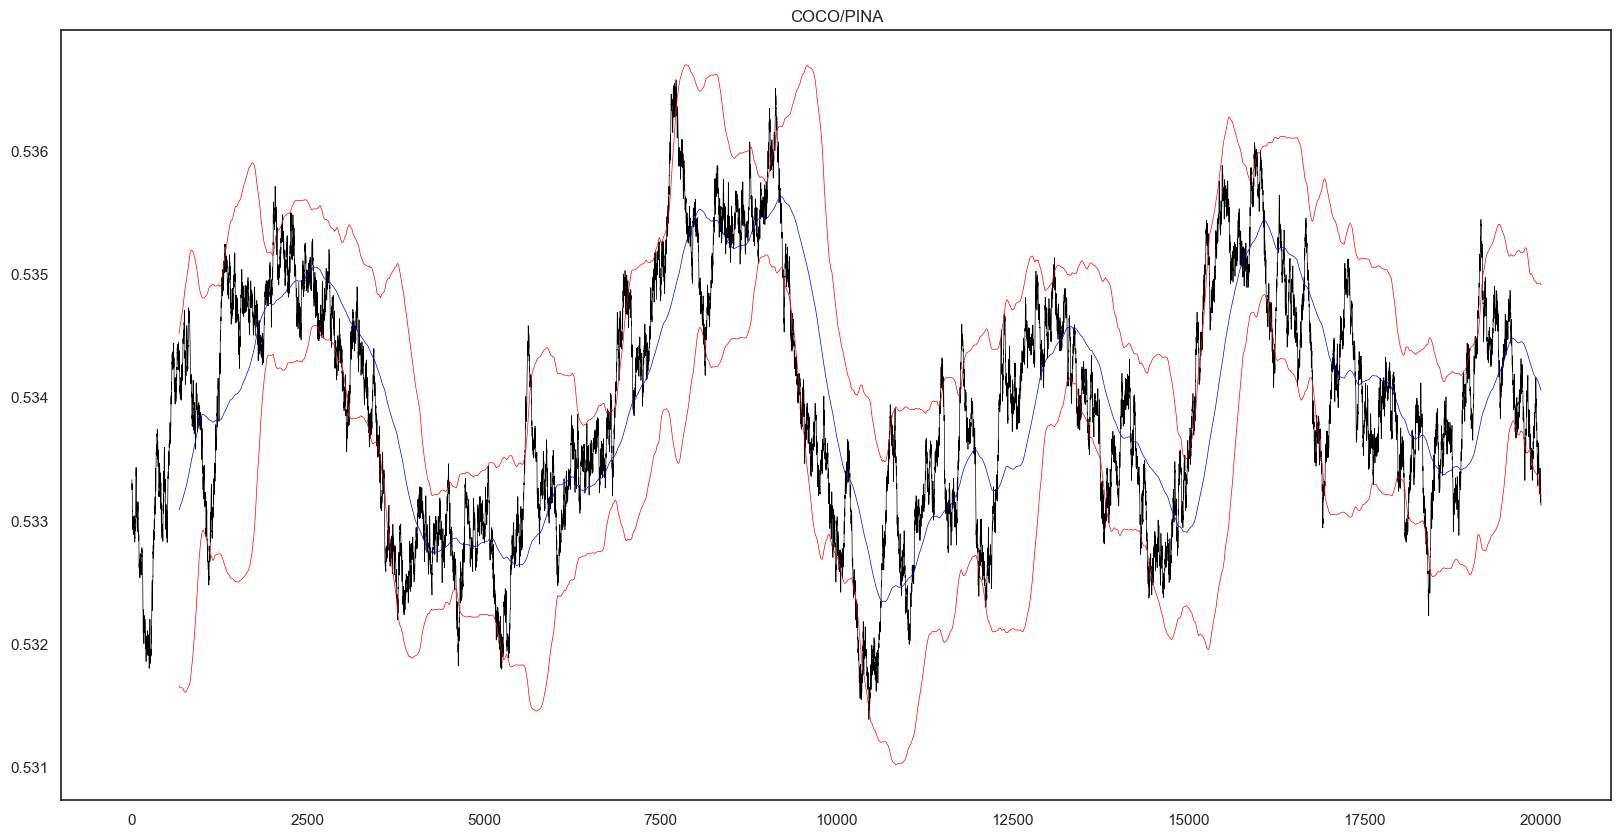

<function matplotlib.pyplot.show(close=None, block=None)>

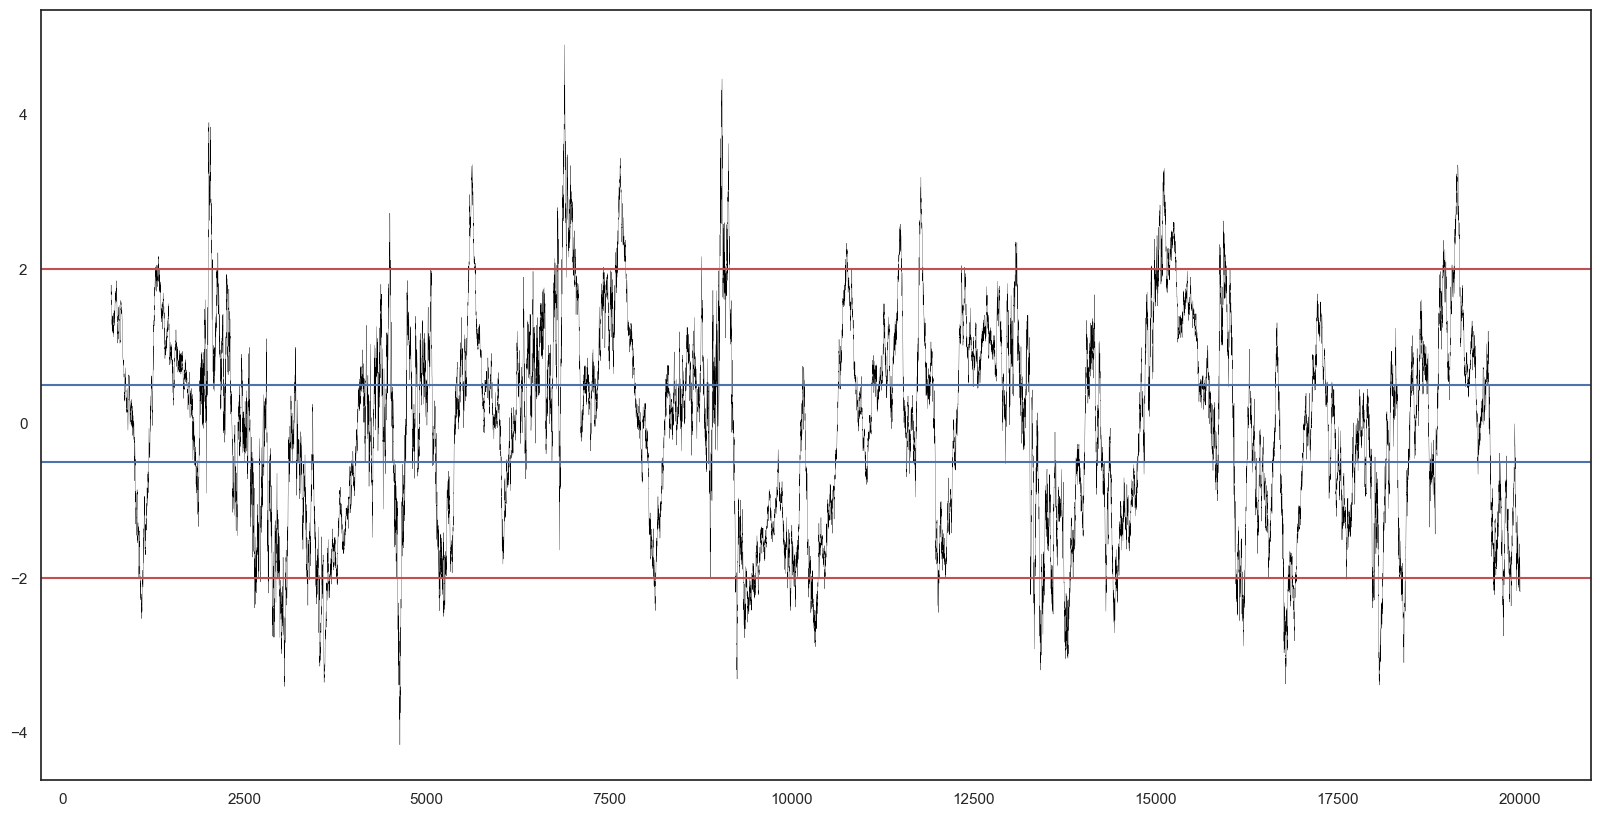

In [20]:
df_CP = pd.DataFrame()

zin = 2
zout = 0.5

df_CP['COCO/PINA'] = all_coco['mid_price']/all_pina['mid_price']
df_CP['670MA'] = df_CP['COCO/PINA'].rolling(window=670).mean()
df_CP['320MA'] = df_CP['COCO/PINA'].rolling(window=320).mean()
df_CP['670STD'] = df_CP['COCO/PINA'].rolling(window=670).std()
df_CP['320STD'] = df_CP['COCO/PINA'].rolling(window=320).std()
#maybe make zvalue
plt.plot(df_CP['COCO/PINA'], label = f'MID', linewidth = 0.5, color = 'black')
plt.plot(df_CP['670MA'], label = f'670MA', linewidth = 0.5, color = 'blue')
plt.plot(df_CP['670MA']+zin*df_CP['670STD'], label = f'{zin}STD', linewidth = 0.5, color = 'red')
plt.plot(df_CP['670MA']-zin*df_CP['670STD'], linewidth = 0.5, color = 'red')
plt.title('COCO/PINA')
plt.show()

#analyse
z = (df_CP['COCO/PINA']-df_CP['670MA'])/df_CP['670STD']
plt.plot(z, linewidth = 0.2, color = 'black')
plt.axhline(zin, color = 'r')
plt.axhline(-zin, color = 'r')
plt.axhline(zout, color = 'b')
plt.axhline(-zout, color = 'b')
plt.show

# Using 2xCOCONUTS/PINA COLADAS

In [ ]:
df_CCP = pd.DataFrame()

df_CCP['2COCO/PINA'] = 2*all_coco['mid_price']/all_pina['mid_price']

plt.plot(df['COCO/PINA'], label = f'mid '+asset, linewidth = 0.5, color = 'black')
plt.title('COCO/PINA')
plt.show()
df['timestamp'] = all_coco['timestamp']
df["COCONUTS"] = all_coco['mid_price']
df["PINA_COLADAS"] = all_pina['mid_price']

# Using PINA COLADAS-1.875xCOCONUTS

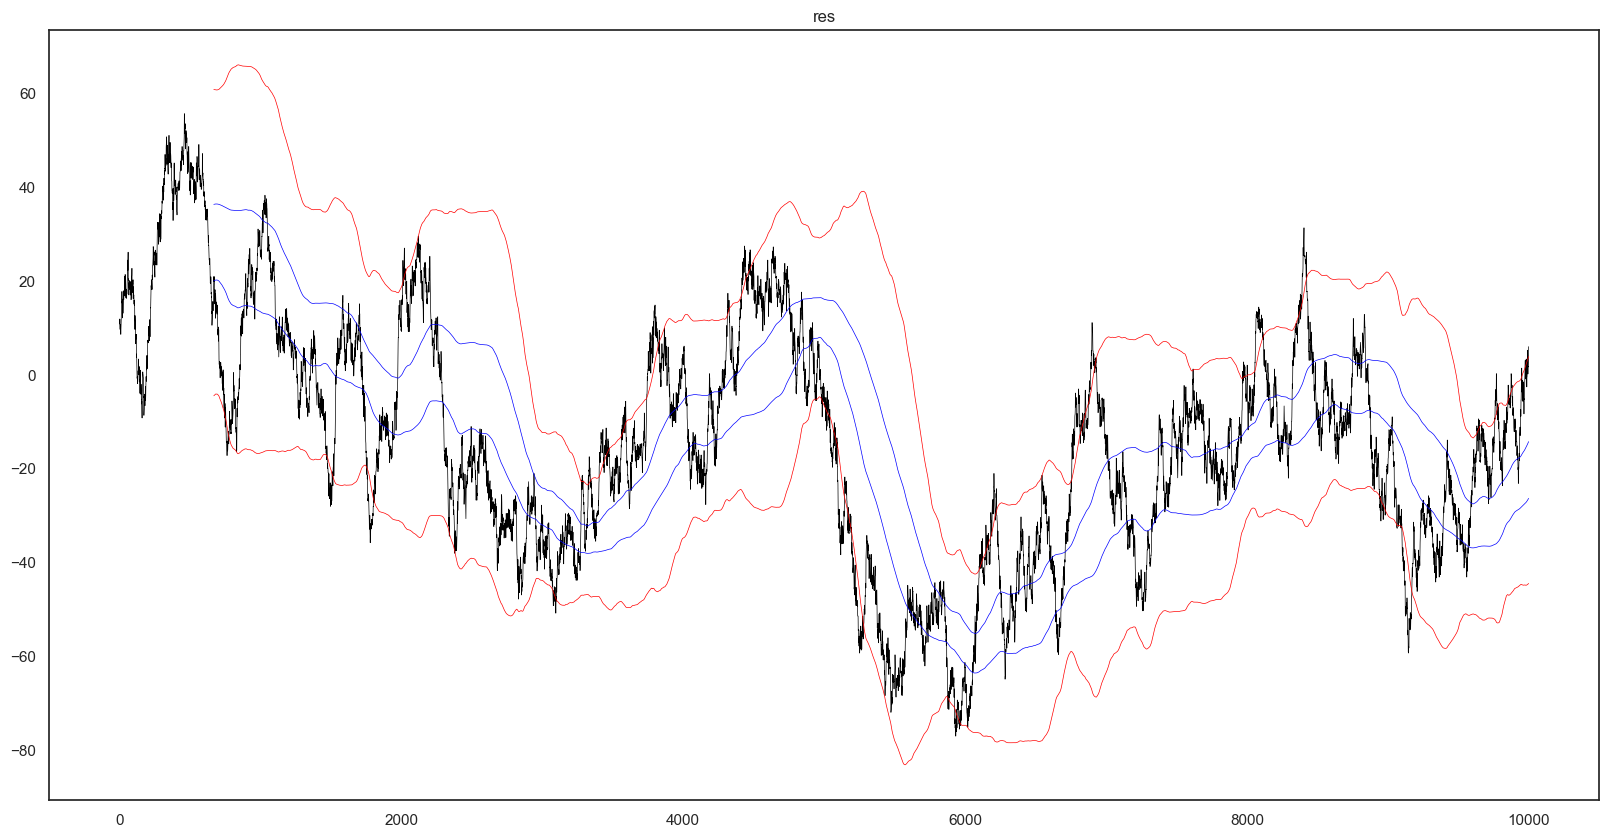

<function matplotlib.pyplot.show(close=None, block=None)>

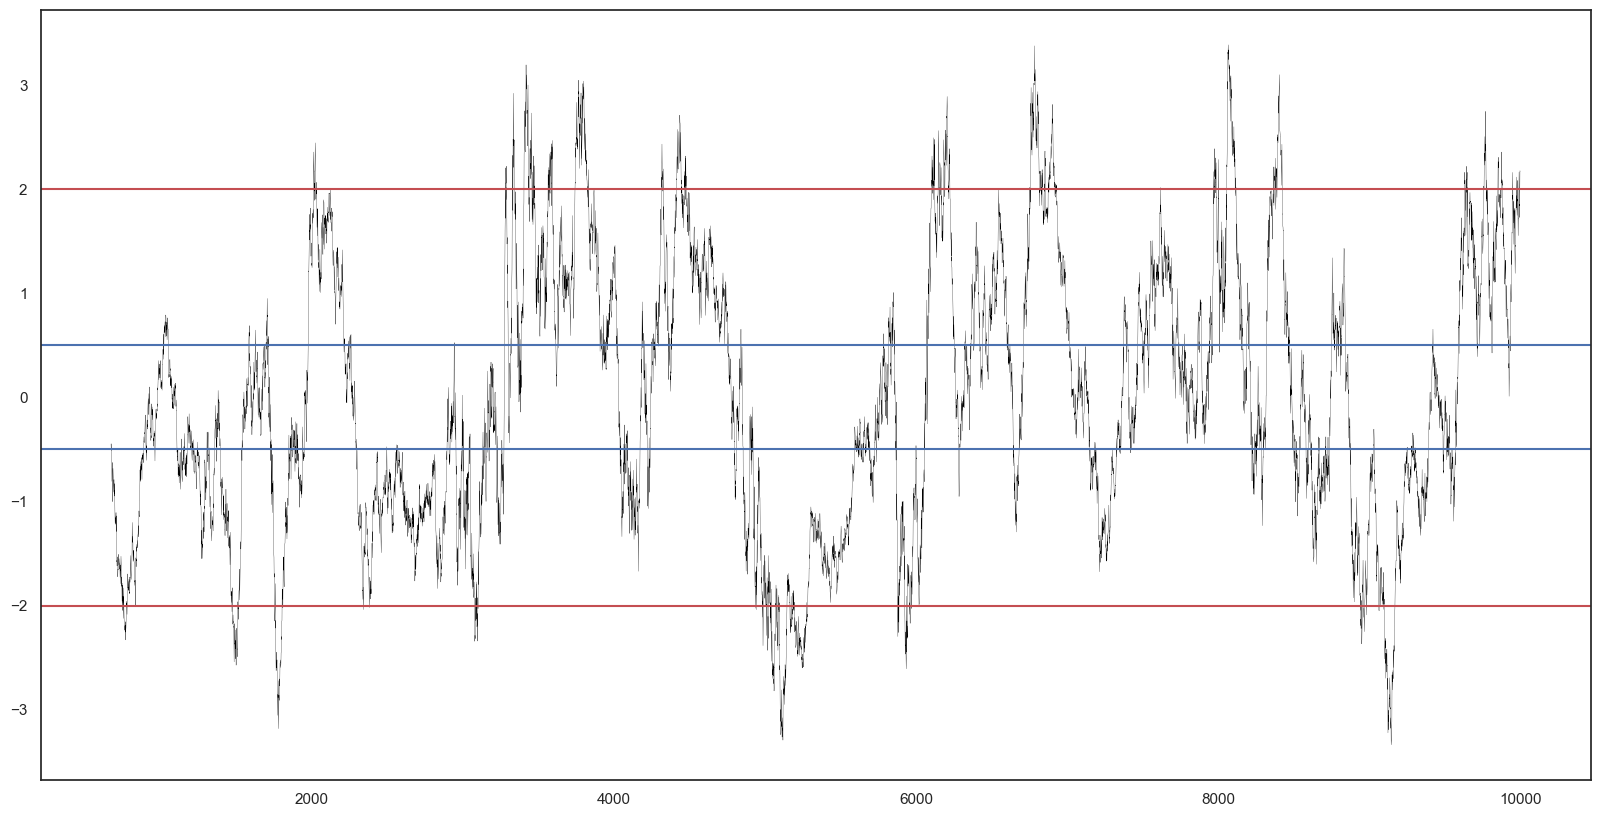

In [27]:
df_res = pd.DataFrame()
beta_hr = 1.875
zin = 2
zout = 0.5

df_res["res"] = df2_pina['mid_price'] - (beta_hr*df2_coco['mid_price'])
df_res['670MA'] = df_res['res'].rolling(window=670).mean()
df_res['320MA'] = df_res['res'].rolling(window=320).mean()
df_res['670STD'] = df_res['res'].rolling(window=670).std()
df_res['320STD'] = df_res['res'].rolling(window=320).std()
#maybe make zvalue
plt.plot(df_res['res'], label = f'MID', linewidth = 0.5, color = 'black')
plt.plot(df_res['670MA']+zout*df_res['670STD'], label = f'670MA', linewidth = 0.5, color = 'blue')
plt.plot(df_res['670MA']-zout*df_res['670STD'], label = f'670MA', linewidth = 0.5, color = 'blue')
plt.plot(df_res['670MA']+zin*df_res['670STD'], label = f'{zin}STD', linewidth = 0.5, color = 'red')
plt.plot(df_res['670MA']-zin*df_res['670STD'], linewidth = 0.5, color = 'red')
plt.title('res')
plt.show()

#analyse
z = (df_res['res']-df_res['670MA'])/df_res['670STD']
plt.plot(z, linewidth = 0.2, color = 'black')
plt.axhline(zin, color = 'r')
plt.axhline(-zin, color = 'r')
plt.axhline(zout, color = 'b')
plt.axhline(-zout, color = 'b')
plt.show